# Importing libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

In [2]:
from tensorflow.keras.applications import MobileNetV2

In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Importing Data

The data is divides into two classes : def_front and ok_front

- def_front represents :  damaged brake disc 
- ok_front represents : good brake disc

In [5]:
dataset=r'F:\Fichiers important\machine learning project\casting_data'
imagePaths=list(paths.list_images(dataset))

In [6]:
imagePaths

['F:\\Fichiers important\\machine learning project\\casting_data\\test\\def_front\\cast_def_0_1059.jpeg',
 'F:\\Fichiers important\\machine learning project\\casting_data\\test\\def_front\\cast_def_0_1063.jpeg',
 'F:\\Fichiers important\\machine learning project\\casting_data\\test\\def_front\\cast_def_0_108.jpeg',
 'F:\\Fichiers important\\machine learning project\\casting_data\\test\\def_front\\cast_def_0_1096.jpeg',
 'F:\\Fichiers important\\machine learning project\\casting_data\\test\\def_front\\cast_def_0_112.jpeg',
 'F:\\Fichiers important\\machine learning project\\casting_data\\test\\def_front\\cast_def_0_1134.jpeg',
 'F:\\Fichiers important\\machine learning project\\casting_data\\test\\def_front\\cast_def_0_1136.jpeg',
 'F:\\Fichiers important\\machine learning project\\casting_data\\test\\def_front\\cast_def_0_1137.jpeg',
 'F:\\Fichiers important\\machine learning project\\casting_data\\test\\def_front\\cast_def_0_1153.jpeg',
 'F:\\Fichiers important\\machine learning proje

# Pre-process Data

We're going to split our data into two lists in order to organize our labels. 
- A list of our data
- A list of our labels

The loop bellow stores the label of each image in the list labels.

In [7]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(300,300)) 
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)
    
print(labels)

['def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front'

The loop also takes all the images and transform them into arrays

In [8]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

Also, we are going to transform the labels into a binarized array

In [9]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

Now, we're going to split our data and their corresponding labels into test and train data

In [10]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.30,stratify=labels,random_state=10)

In [11]:
from tensorflow.keras.layers import Input

# Visualise the data

Now, let's visualise some of our data and their corresponding labels, to do that we're going to use the function bellow to show some random examples from our preprocessed data

In [12]:
class_names = ['def_front','ok_front']
def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

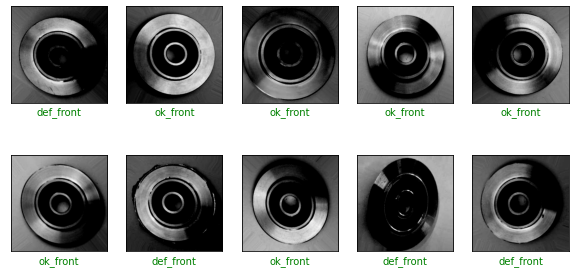

In [13]:
show_random_examples(train_X, train_Y, train_Y)

# Create DL Model CNN

Let's start by creating our CNN model using some filters to extract our features.

The choice of a CNN model can be justified by : 

Our goal is to classify a random image of a brake disc, CNN model help us pre-prosess our data to extract features using filters (kernels) and make prediction on random images. in other words, it's a classification prediction problem.

In [14]:
import tensorflow as tf
baseModel = tf.keras.models.Sequential( [
                                   tf.keras.layers.Conv2D(10, (3,3), activation = "relu", input_shape = (300,300,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation = "relu"),
                                   tf.keras.layers.Dense(10, activation ="softmax")
])

In [15]:
headModel=baseModel.output
#headModel=AveragePooling2D(pool_size=(7,7), padding='same')(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

In [16]:
model=Model(inputs=baseModel.input,outputs=headModel)

In [17]:
for layer in baseModel.layers:
    layer.trainable=False

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      5824      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 341056)            0     

# Model Training

The accuracy of our traning model is based on the way we choose our hyperparameters for this CNN model
- learning rate
- n° of epochs
- number of neurons
- batch size
- activation function
- optimizer

In [18]:
lr=0.01
Epochs=20
BS=220

opt=Adam(learning_rate=lr,decay=lr/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [19]:
history = model.fit(train_X, train_Y, epochs = 20 , validation_data = (test_X, test_Y))

Epoch 1/20
161/161 [==============================] - 134s 801ms/step - loss: 0.6845 - accuracy: 0.5722 - val_loss: 0.6824 - val_accuracy: 0.5732
Epoch 2/20
161/161 [==============================] - 122s 759ms/step - loss: 0.6836 - accuracy: 0.5730 - val_loss: 0.6822 - val_accuracy: 0.5732
Epoch 3/20
161/161 [==============================] - 129s 800ms/step - loss: 0.6840 - accuracy: 0.5730 - val_loss: 0.6823 - val_accuracy: 0.5732
Epoch 4/20
161/161 [==============================] - 126s 781ms/step - loss: 0.6832 - accuracy: 0.5730 - val_loss: 0.6828 - val_accuracy: 0.5732
Epoch 5/20
161/161 [==============================] - 127s 790ms/step - loss: 0.6826 - accuracy: 0.5730 - val_loss: 0.6823 - val_accuracy: 0.5732
Epoch 6/20
161/161 [==============================] - 187s 1s/step - loss: 0.6830 - accuracy: 0.5730 - val_loss: 0.6825 - val_accuracy: 0.5732
Epoch 7/20
161/161 [==============================] - 120s 745ms/step - loss: 0.6827 - accuracy: 0.5730 - val_loss: 0.6823 - va

# Model Save 

In [20]:
model.save(r'F:\Fichiers important\machine learning project\models\first1.pb')

INFO:tensorflow:Assets written to: F:\Fichiers important\machine learning project\models\first1.pb\assets


# Model Evaluation

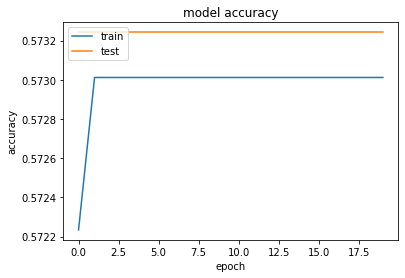

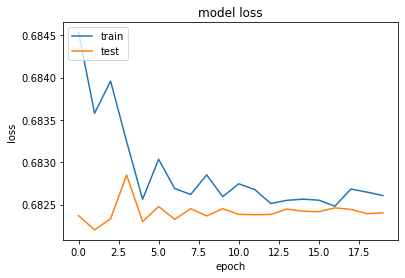

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
mse, mae = model.evaluate(train_X, train_Y)

161/161 [==============================] - 80s 490ms/step - loss: 0.6832 - accuracy: 0.5730


In [26]:
mse

0.6831756234169006

In [27]:
mae

0.5730118751525879

# Model training with Data Augmentation

Now, we're going to use the same model but with data augmentation. To do that we're going to use the function ImageDataGenerator

In [12]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [24]:
lr=0.01
Epochs=20
BS=220

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)

Epoch 1/20
23/23 [==============================] - 228s 10s/step - loss: 0.6848 - accuracy: 0.5730 - val_loss: 0.6834 - val_accuracy: 0.5732
Epoch 2/20
23/23 [==============================] - 194s 8s/step - loss: 0.6847 - accuracy: 0.5708 - val_loss: 0.6826 - val_accuracy: 0.5732
Epoch 3/20
23/23 [==============================] - 182s 8s/step - loss: 0.6828 - accuracy: 0.5728 - val_loss: 0.6824 - val_accuracy: 0.5732
Epoch 4/20
23/23 [==============================] - 194s 8s/step - loss: 0.6826 - accuracy: 0.5732 - val_loss: 0.6823 - val_accuracy: 0.5732
Epoch 5/20
23/23 [==============================] - 215s 9s/step - loss: 0.6833 - accuracy: 0.5716 - val_loss: 0.6824 - val_accuracy: 0.5732
Epoch 6/20
23/23 [==============================] - 249s 11s/step - loss: 0.6835 - accuracy: 0.5721 - val_loss: 0.6823 - val_accuracy: 0.5732
Epoch 7/20
23/23 [==============================] - 213s 9s/step - loss: 0.6820 - accuracy: 0.5751 - val_loss: 0.6822 - val_accuracy: 0.5732
Epoch 8/20


# Model Save

In [25]:
model.save(r'F:\Fichiers important\machine learning project\models\first2.pb')

INFO:tensorflow:Assets written to: F:\Fichiers important\machine learning project\models\first2.pb\assets


# Model Evaluation

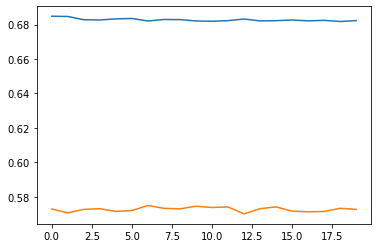

In [26]:
plt.plot(H.history['loss'])
plt.plot(H.history['accuracy'])

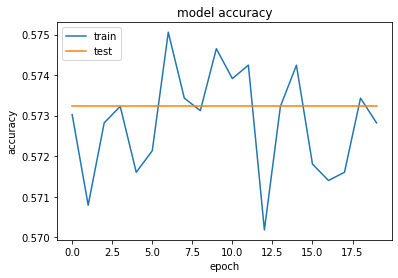

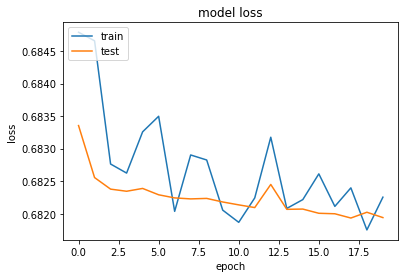

In [27]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
mse, mae = model.evaluate(train_X, train_Y)

161/161 [==============================] - 57s 343ms/step - loss: 0.6821 - accuracy: 0.5730


In [29]:
mse

0.6821176409721375

In [30]:
mae

0.5730118751525879

# Improving accuracy

In order to improve even more the quality of our accuracy we're going to use a pre-defined model as an input.
This model is MobileNetV2

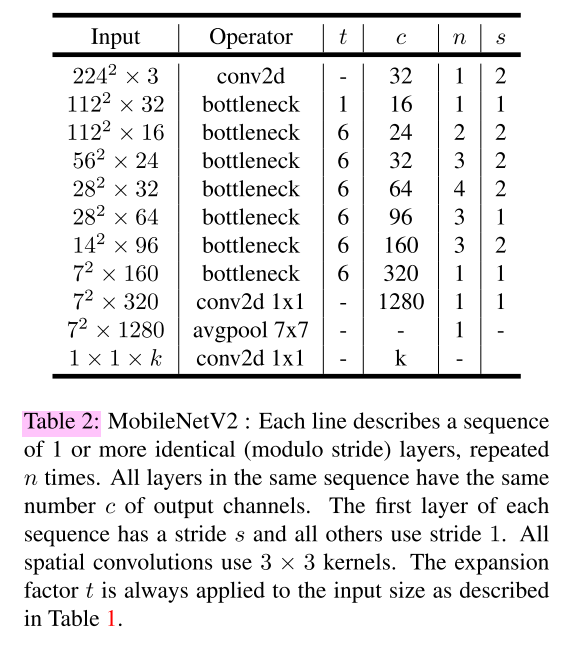

In [3]:
from IPython.display import display, Image
display(Image(filename='MobileNetV2.png'))

We souldn't forget that the accuracy of our traning model is based also on the way we choose our hyperparameters for this CNN model
- learning rate
- n° of epochs
- number of neurons
- batch size
- activation function
- optimizer

In [13]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(300,300,3)))
print(baseModel.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 150, 150, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 150, 150, 32  128         ['Conv1[0][0]']                  
                                )                                              

 ization)                                                                                         
                                                                                                  
 block_3_expand_relu (ReLU)     (None, 75, 75, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 77, 77, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 38, 38, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 38, 38, 144)  576        ['block_3_depthwise[0][0]']      
 malizatio

                                                                                                  
 block_6_project_BN (BatchNorma  (None, 19, 19, 64)  256         ['block_6_project[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 19, 19, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 19, 19, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 19, 19, 384)  0           ['block_7_expand_BN[0][0]']      
          

 block_10_depthwise_BN (BatchNo  (None, 19, 19, 384)  1536       ['block_10_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 19, 19, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 19, 19, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 19, 19, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_

 block_14_expand_relu (ReLU)    (None, 10, 10, 960)  0           ['block_14_expand_BN[0][0]']     
                                                                                                  
 block_14_depthwise (DepthwiseC  (None, 10, 10, 960)  8640       ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 10, 10, 960)  3840       ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 10, 10, 960)  0          ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_

In [14]:
headModel=baseModel.output
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

In [15]:
model2=Model(inputs=baseModel.input,outputs=headModel)

In [16]:
lr=0.01
Epochs=5
BS=50

opt=Adam(learning_rate=lr,decay=lr/Epochs)
model2.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
H=model2.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)

Epoch 1/5
 84/102 [=======================>......] - ETA: 5:31 - loss: 9.6078 - accuracy: 0.5342

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['accuracy'])

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Final Prediction

In [23]:
preds = model.predict(test_X/300.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

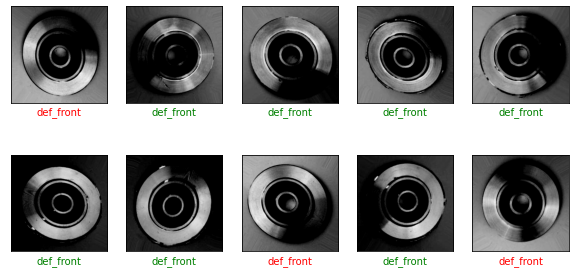

In [41]:
show_random_examples(test_X, test_Y, preds)